In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split


In [47]:
df = sns.load_dataset('iris')

In [48]:
x = df.drop(['species'], axis=1)

x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y = df.species

y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [50]:
y, class_name = pd.factorize(df.species)
class_name

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

## K-nearest neighbors


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
model.fit(x_train, y_train)

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {:.3f}".format(cvs.mean()*100))

cross val score : [0.967 1.    0.967 0.967 1.   ]
mean : 98.000


In [52]:
k_list = [i for i in range(1, 22)]
cvs_list = []
for i, k in enumerate(k_list):
    model = KNeighborsClassifier(n_neighbors=k)

    cvs = cross_val_score(model, x, y, cv = 5)
    cvs_list.append(cvs.mean().round(4))

cvs_list

[0.96,
 0.9467,
 0.9667,
 0.9733,
 0.9733,
 0.98,
 0.98,
 0.9667,
 0.9733,
 0.98,
 0.98,
 0.98,
 0.9733,
 0.9667,
 0.9667,
 0.9667,
 0.9667,
 0.9667,
 0.9667,
 0.96,
 0.9667]

In [53]:
list(zip(k_list, cvs_list))

[(1, 0.96),
 (2, 0.9467),
 (3, 0.9667),
 (4, 0.9733),
 (5, 0.9733),
 (6, 0.98),
 (7, 0.98),
 (8, 0.9667),
 (9, 0.9733),
 (10, 0.98),
 (11, 0.98),
 (12, 0.98),
 (13, 0.9733),
 (14, 0.9667),
 (15, 0.9667),
 (16, 0.9667),
 (17, 0.9667),
 (18, 0.9667),
 (19, 0.9667),
 (20, 0.96),
 (21, 0.9667)]

Text(0.5, 1.0, 'Score and k')

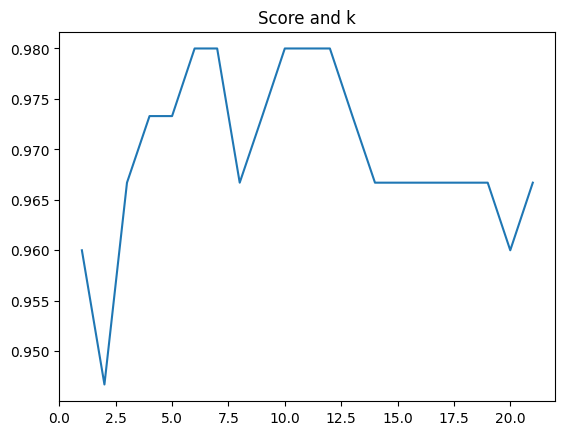

In [54]:
plt.plot(k_list, cvs_list)
plt.title("Score and k")

In [55]:
model = KNeighborsClassifier(n_neighbors=12)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
model.fit(x_train, y_train)

cvs = cross_val_score(model, x, y, cv=5)
print("cross val score : {}".format(cvs.round(3)))
print("mean : {}".format(cvs.mean()*100))

cross val score : [0.933 1.    1.    0.967 1.   ]
mean : 98.00000000000001


In [56]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=class_name))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.87      0.93      0.90        14
   virginica       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[17  0  0]
 [ 0 13  1]
 [ 0  2 12]]


Text(0.5, 1.0, 'Confusion Matrix')

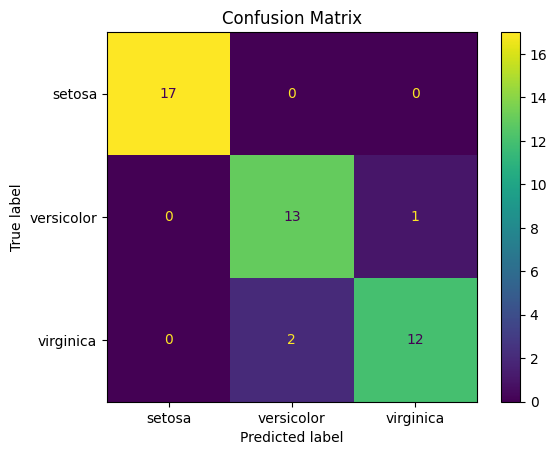

In [57]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title("Confusion Matrix")


## PCA : Pricipal Component Analysis
#### 4 feature -> 2 feasture

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=20)

In [59]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Text(0, 0.5, 'PCA2')

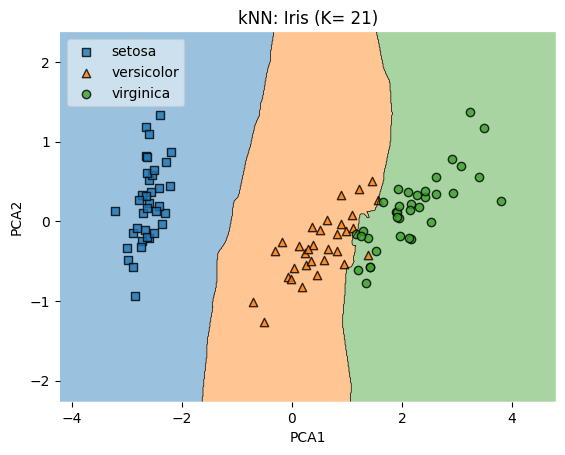

In [60]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(x_train), y_train,
                           clf=model, legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_name, framealpha=0.5, loc="upper left")

plt.title("kNN: Iris (K= {})".format(k))
plt.xlabel("PCA1")
plt.ylabel("PCA2")